# Import Necessary Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')

import opendatasets as od

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
# Download the averaged_perceptron_tagger for English
nltk.download('averaged_perceptron_tagger_eng')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedshibinyousafm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedshibinyousafm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedshibinyousafm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mohammedshibinyousafm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/mohammedshibinyousafm/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## Loading the Data


In [2]:
# Downloading the dataset using Opendatasets

od.download('https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data')

Skipping, found downloaded files in "./twitter-entity-sentiment-analysis" (use force=True to force download)


In [3]:
df_train = pd.read_csv('twitter-entity-sentiment-analysis/twitter_training.csv')
df_val = pd.read_csv('twitter-entity-sentiment-analysis/twitter_validation.csv')

df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
df = pd.concat([df_train, df_val], ignore_index=False)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [6]:
# Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

In [7]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

# Rename columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


## Checking missing and duplicated values

In [8]:
# check missing values
print(df.isnull().sum())

Branch        999
Sentiment     999
Tweet        1685
dtype: int64


In [9]:
# remove missing values
df.dropna(inplace=True)

# check missing values
df.isnull().sum() 

Branch       0
Sentiment    0
Tweet        0
dtype: int64

In [10]:
# check duplicate values
df.duplicated().sum()

np.int64(3038)

In [11]:
# remove duplicate values 
remove_duplicates = df.drop_duplicates()
df = remove_duplicates

# check duplicate values
df.duplicated().sum()


np.int64(0)

# Visualization

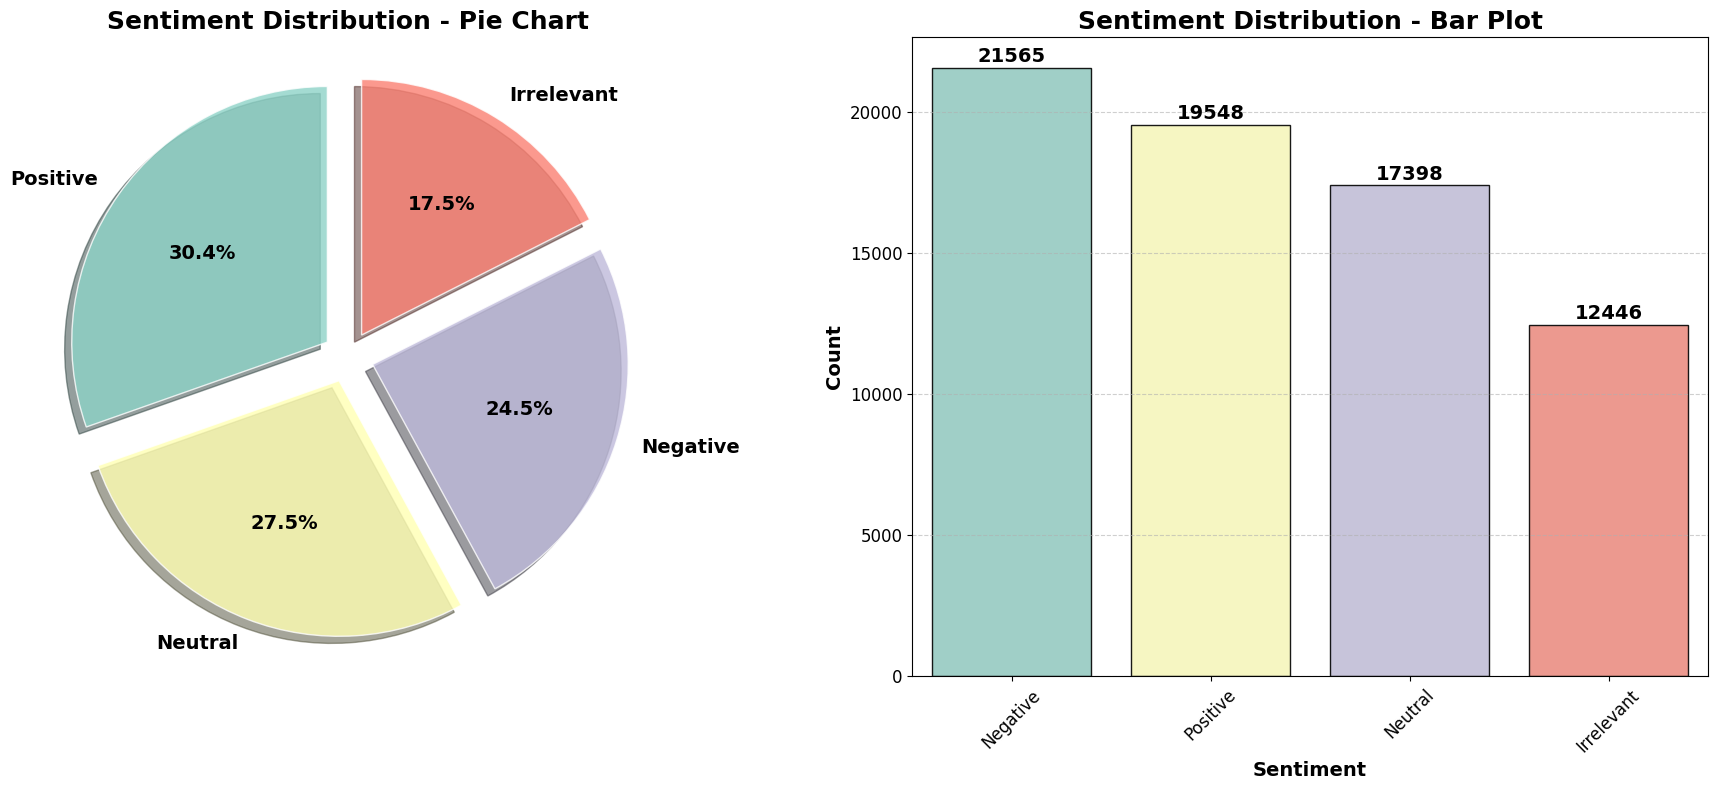

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# new color palette 
colors = sns.color_palette("Set3", n_colors=4)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

wedges, texts, autotexts = axs[0].pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), 
                                      autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 
                                      'edgecolor': 'white', 'linestyle': 'solid'}, 
                                      textprops={'fontsize': 14, 'weight': 'bold'}, explode=[0.1, 0.1, 0.1, 0.1], 
                                      colors=colors, shadow=True)

for wedge in wedges:
    wedge.set_alpha(0.8) 

axs[0].set_title('Sentiment Distribution - Pie Chart', fontsize=18, weight='bold')

sns.barplot(x=df['Sentiment'].value_counts().index, y=df['Sentiment'].value_counts().values, 
            ax=axs[1], palette=colors, edgecolor='black', alpha=0.9)


axs[1].set_title('Sentiment Distribution - Bar Plot', fontsize=18, weight='bold')
axs[1].set_xlabel('Sentiment', fontsize=14, weight='bold')
axs[1].set_ylabel('Count', fontsize=14, weight='bold')

axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

for p in axs[1].patches:
    axs[1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

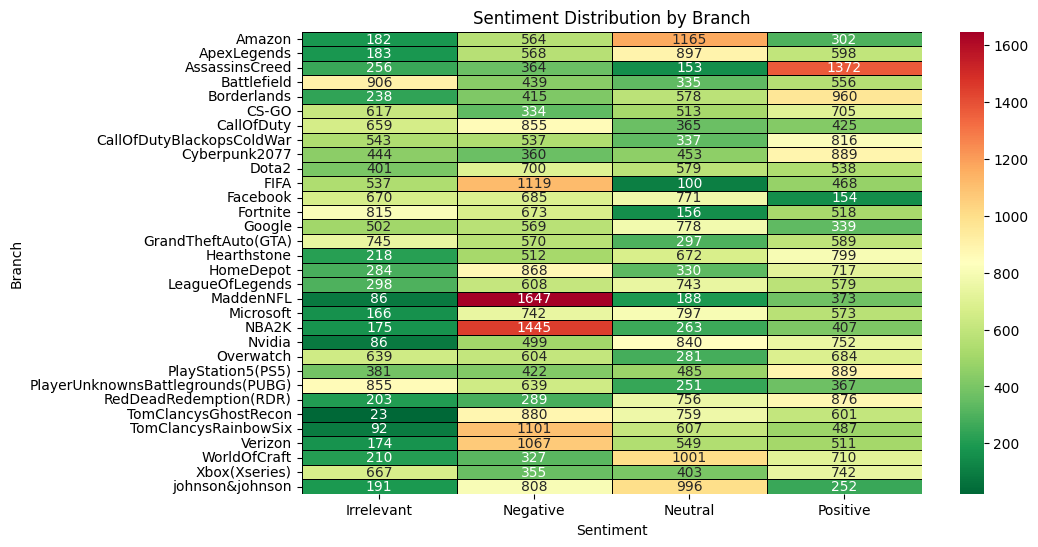

In [13]:
# Create cross-tabulation table in plot

plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['Branch'], columns=df['Sentiment'])

sns.heatmap(count_table, cmap='RdYlGn_r', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [14]:
# Display minimum and maximum values for each sentiment for each branch

for sentiment in count_table.columns:
    min_branch = count_table[sentiment].idxmin()
    max_branch = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")

Sentiment 'Irrelevant':
  Minimum value '23' at Branch 'TomClancysGhostRecon'
  Maximum value '906' at Branch 'Battlefield'

Sentiment 'Negative':
  Minimum value '289' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Branch 'FIFA'
  Maximum value '1165' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1372' at Branch 'AssassinsCreed'



## WordCloud

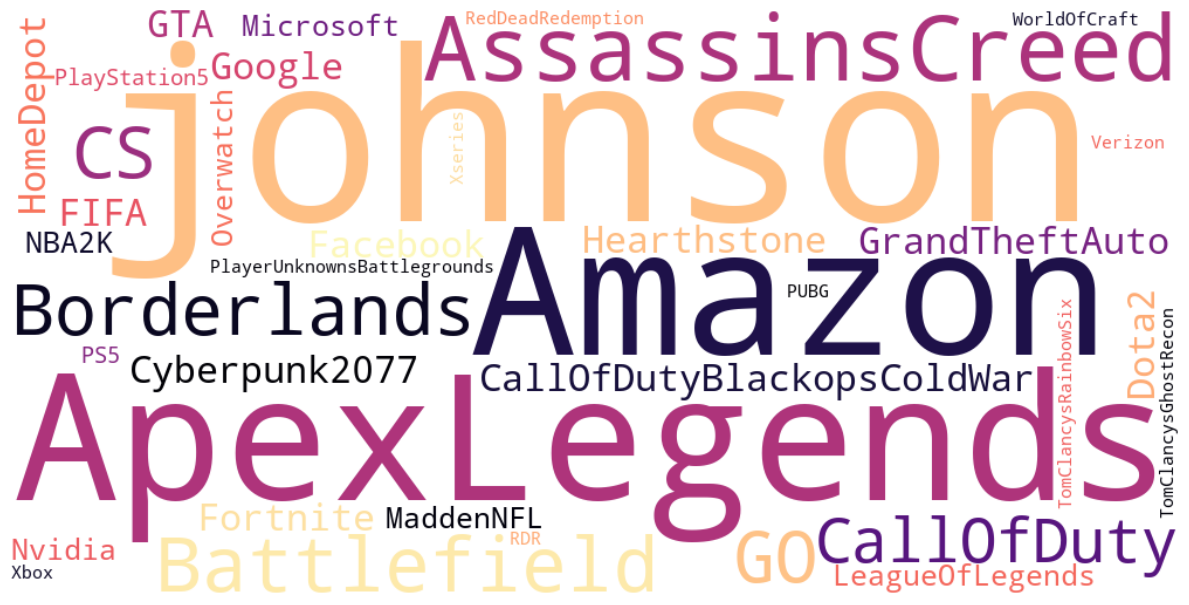

In [15]:
# Convert branches to a single string
branches_text = ' '.join(count_table.index)

wordcloud = WordCloud(width=1000, height=500, background_color='white', 
                      colormap='magma_r', contour_color='white', 
                      contour_width=2, max_words=200, 
                      stopwords=None, 
                      font_path=None, 
                      prefer_horizontal=0.9).generate(branches_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

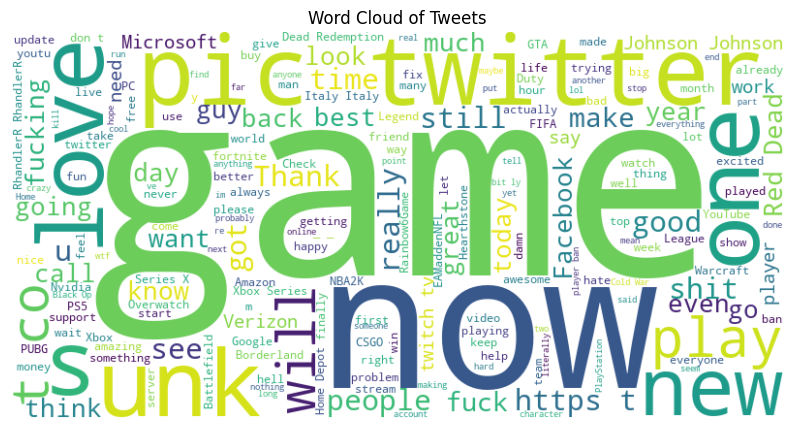

In [16]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

# Preprocessing

In [17]:
def filter_non_string(df, column):
    """
    Filter out rows with non-string values in the specified column.
    Convert non-string values to strings.
    """
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

### Uppercase to Lowercase
This function converts all characters in the text to lowercase to standardize the text and avoid discrepancies caused by case sensitivity (e.g., “Hello” and “hello” would be treated as the same).

In [18]:
def to_lowercase(text):
    """Convert text to lowercase."""
    return text.lower()

### remove_html_tags Function

This function removes HTML tags from the text, ensuring that only the plain text remains. It’s useful for cleaning data scraped from web pages where HTML tags might be present.

In [19]:
from bs4 import BeautifulSoup
def remove_html_tags(text):
    """Remove HTML tags."""
    return BeautifulSoup(text, "html.parser").get_text()

### remove_urls Function

This function removes URLs from the text to eliminate hyperlinks, which are often irrelevant and can introduce noise in text data analysis.

In [20]:
def remove_urls(text):
    """Remove URLs or hyperlinks from the text."""
    return re.sub(r'http\S+|www\S+', '', text)

### remove_digits_and_punctuation Function

This function removes digits and punctuation marks from the text. It focuses on keeping only alphabetic characters and spaces, which is useful when processing textual data for analysis.

In [21]:
def remove_digits_and_punctuation(text):
    """Remove digits and punctuation."""
    text = re.sub(r'[^a-z\s]', '', text)
    return text

### TextBlob for Spell Correction

The TextBlob library provides a simple API for text processing, including spell correction. The correct_spelling function uses TextBlob’s built-in spell check functionality to identify and correct common spelling errors in the text. It can be useful when working with noisy text data, such as user-generated content or informal language.

In [22]:
from textblob import TextBlob

def correct_spelling(text):
    """Correct spelling errors in the text."""
    return str(TextBlob(text).correct())

### Tokenization

In [23]:
def tokenize_text(text):
    """Split the text into individual words or tokens."""
    if isinstance(text, str):  # Ensure it's a string before processing
        return word_tokenize(text)
    else:
        return []  # Return an empty list if the input is not a string

### remove_stopwords_

This function removes stopwords (common words like “the”, “and”, “is”) that do not carry meaningful information

In [24]:
def remove_stopwords(tokens):
    """Eliminate common stopwords from the tokenized text."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

### remove_emojis Function

This function removes emojis from the text using a regular expression pattern that matches various types of emojis, including emoticons, symbols, flags, and other special characters.

In [25]:
def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # Chinese characters
                                   u"\U00002702-\U000027B0"
                                   u"\U0001f926-\U0001f937"  # various symbols
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

## Lemmatization

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):  # Adjective
        return wordnet.ADJ
    elif tag.startswith('V'):  # Verb
        return wordnet.VERB
    elif tag.startswith('N'):  # Noun
        return wordnet.NOUN
    elif tag.startswith('R'):  # Adverb
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function to lemmatize tokens with POS tagging
def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        tagged = pos_tag(tokens)  # Get POS tags
        return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]
    return tokens  # If not a list, return as-is




In [27]:
def preprocess_text(df):
    df = filter_non_string(df,'Tweet')
    df['Clean_Tweet'] = df['Tweet'].apply(to_lowercase)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_html_tags)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_urls)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_digits_and_punctuation)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(tokenize_text)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_stopwords)
    df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_emojis)
    df['lemmatized_tweet'] = df['Clean_Tweet'].apply(lemmatize_tokens)
    
    return df

# Usage:
df_processed = preprocess_text(df)

In [28]:
df_processed.head()

,Branch,Sentiment,Tweet,Clean_Tweet,lemmatized_tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]","[come, border, kill]"
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]","[im, get, borderland, kill]"
2,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[im, come, borderland, murder]"
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, murder]","[im, get, borderland, murder]"
4,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]","[im, get, borderland, murder]"


## Label Encoding



In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

df['Sentiment']

0        3
1        3
2        3
3        3
4        3
        ..
74676    3
74677    3
74678    3
74679    3
74680    3
Name: Sentiment, Length: 70957, dtype: int64

## Build Model

In [30]:
# Split data

# Convert list of words into a single string for each entry in 'Tweet' column
df_processed['lemmatized_tweet_new'] = df_processed['lemmatized_tweet'].apply(lambda x: ' '.join(x))


X = df_processed['lemmatized_tweet_new']  
y = df_processed['Sentiment']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


## Random Forest Classifier Model

In [31]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9075535512965051


### Confusion Matrix (Random Forest)

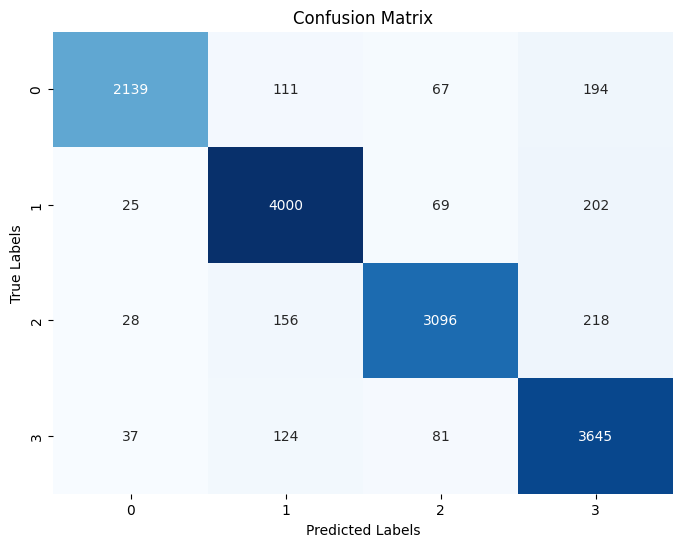

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      2511
    Negative       0.91      0.93      0.92      4296
     Neutral       0.93      0.89      0.91      3498
    Positive       0.86      0.94      0.89      3887

    accuracy                           0.91     14192
   macro avg       0.92      0.90      0.91     14192
weighted avg       0.91      0.91      0.91     14192



In [32]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

### Actual vs Predicted (Random Forest)

In [33]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: woman please work store like circuit home hardware get bore condescend men think dont know another screw
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: hard fight indeed
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: rhandlerr im superstar solo win criminal deserve pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
-----------------------
Tweet: ea eamaddennfl recent announcement ea lock another long term contract nfl remarkably disrespectful fan madden year allow competition madden long quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first play apex get wave happiness bring back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed well ever however death animation exactl

## Naive Bayes Model

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the Model
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Test Accuracy: 0.6982807215332582
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.36      0.52      2511
    Negative       0.62      0.91      0.74      4296
     Neutral       0.83      0.59      0.69      3498
    Positive       0.68      0.79      0.73      3887

    accuracy                           0.70     14192
   macro avg       0.77      0.66      0.67     14192
weighted avg       0.75      0.70      0.68     14192



### Confusion Matrix (Naive Bayes)

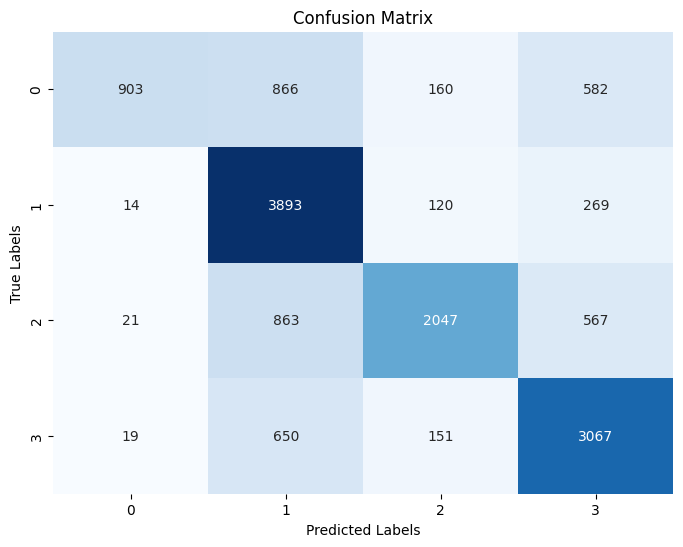

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.36      0.52      2511
    Negative       0.62      0.91      0.74      4296
     Neutral       0.83      0.59      0.69      3498
    Positive       0.68      0.79      0.73      3887

    accuracy                           0.70     14192
   macro avg       0.77      0.66      0.67     14192
weighted avg       0.75      0.70      0.68     14192



In [35]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a classification report
class_report = classification_report(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

### Actual vs Predicted (Naive Bayes)

In [36]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred_nb[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: woman please work store like circuit home hardware get bore condescend men think dont know another screw
Actual Label: Positive
Predicted Label: Negative
-----------------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Positive
-----------------------
Tweet: hard fight indeed
Actual Label: Neutral
Predicted Label: Negative
-----------------------
Tweet: rhandlerr im superstar solo win criminal deserve pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Negative
-----------------------
Tweet: ea eamaddennfl recent announcement ea lock another long term contract nfl remarkably disrespectful fan madden year allow competition madden long quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first play apex get wave happiness bring back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed well ever however death animation exactl

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'rf_model.pkl')

## Text Prediction 

In [ ]:
def predict_sentiment(model, vectorizer, text_data):

    # Transform input text data using the pre-trained vectorizer
    text_tfidf = vectorizer.transform(text_data)
    
    # Predict sentiment using the trained model
    predictions = model.predict(text_tfidf)
    return predictions

In [ ]:

new_texts = [
    "This product is fantastic!",
    "I hated the experience, it was awful.",
    "Its great"
]
predicted_sentiments = predict_sentiment(rf_classifier, vectorizer, new_texts)

print("Predicted Sentiments:", predicted_sentiments)